In [ ]:
#!pip install pandas numpy matplotlib seaborn scikit-learn joblib
# !pip install imblearn

Python(99907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [imblearn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


#from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.pipeline import Pipeline



In [2]:
train = pd.read_csv('../data/Paitients_Files_Train.csv')
test = pd.read_csv('../data/Paitients_Files_Test.csv')

In [3]:
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
test.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [5]:
train.shape

(599, 11)

In [6]:
train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [8]:
train.duplicated().sum()

np.int64(0)

In [9]:
train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
train['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

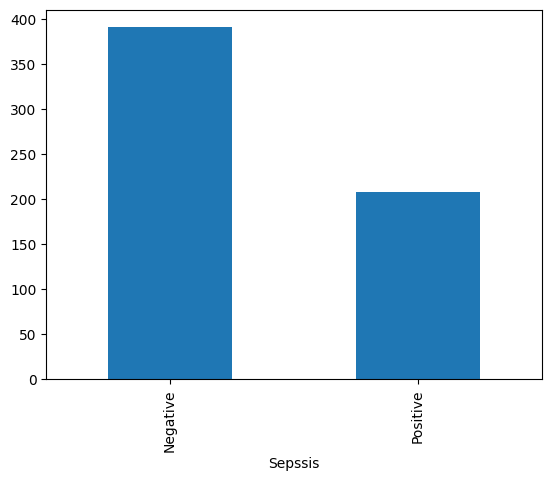

In [11]:
train['Sepssis'].value_counts().plot(kind='bar')
plt.show()

<Axes: ylabel='Frequency'>

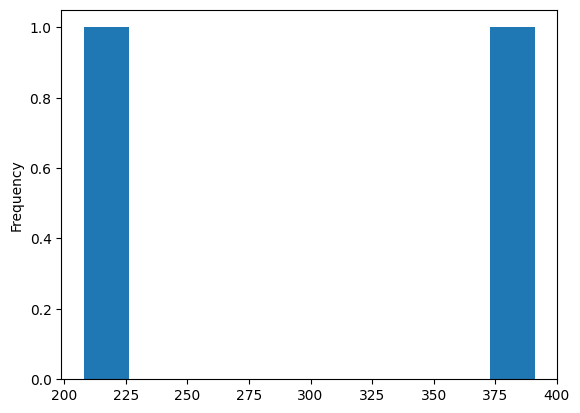

In [12]:
train['Sepssis'].value_counts().plot(kind='hist')


In [13]:
train['Sepssis'].replace({'Positive':1,'Negative':0},inplace=True)

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_1148/3483324938.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Sepssis'].replace({'Positive':1,'Negative':0},inplace=True)
/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_1148/3483324938.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

<Axes: >

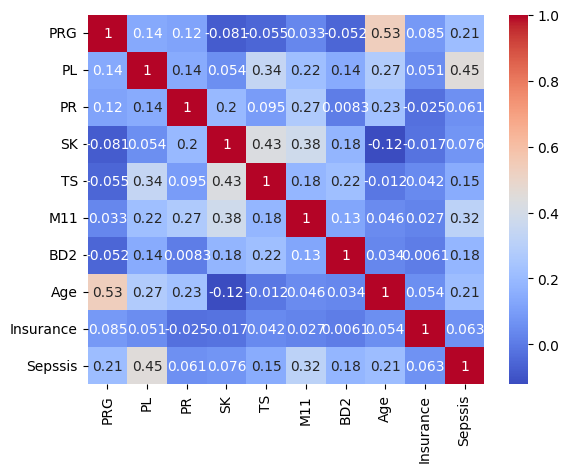

In [14]:
sns.heatmap(train.drop('ID', axis=1).corr(), annot = True, cmap='coolwarm')

In [15]:
X = train.drop(['ID','Sepssis'], axis=1)
y = train['Sepssis']

In [16]:
X

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,1
597,1,89,24,19,25,27.8,0.559,21,0


In [17]:
y

0      1
1      0
2      1
3      0
4      1
      ..
594    0
595    1
596    0
597    0
598    1
Name: Sepssis, Length: 599, dtype: int64

In [18]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((479, 9), (120, 9), (479,), (120,))

In [34]:
pipeline = Pipeline(
    steps = 
        [
            ('imputer', SimpleImputer(strategy='mean') ),
            ('scaler', StandardScaler() ),
            ('Balanced_Sampling', RandomUnderSampler() ),
            ('model', LogisticRegression() )
        ]
    

)

In [35]:
pipeline.fit(train_X, train_y)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [36]:
predict_train = pipeline.predict(train_X)
predict_test = pipeline.predict(test_X)

In [37]:
print("Train Accuracy:", accuracy_score(train_y, predict_train))
print("Test Accuracy:", accuracy_score(test_y, predict_test))

Train Accuracy: 0.7661795407098121
Test Accuracy: 0.725


In [46]:
print("Train confusion_matrix: \n", confusion_matrix(train_y, predict_train))
print("Test confusion_matrix: \n", confusion_matrix(test_y, predict_test))

Train confusion_matrix: 
 [[245  69]
 [ 43 122]]
Test confusion_matrix: 
 [[55 22]
 [11 32]]


In [38]:
print("Train Classification Report:\n", classification_report(train_y, predict_train))
print("Test Classification Report:\n", classification_report(test_y, predict_test))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       314
           1       0.64      0.74      0.69       165

    accuracy                           0.77       479
   macro avg       0.74      0.76      0.75       479
weighted avg       0.78      0.77      0.77       479

Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        77
           1       0.59      0.74      0.66        43

    accuracy                           0.72       120
   macro avg       0.71      0.73      0.71       120
weighted avg       0.75      0.72      0.73       120



In [ ]:
#Model Performance: Before Balancing
# Train Classification Report:
#                precision    recall  f1-score   support

#            0       0.80      0.88      0.83       314
#            1       0.71      0.58      0.64       165

#     accuracy                           0.77       479
#    macro avg       0.75      0.73      0.74       479
# weighted avg       0.77      0.77      0.77       479

# Test Classification Report:
#                precision    recall  f1-score   support

#            0       0.78      0.83      0.81        77
#            1       0.66      0.58      0.62        43

#     accuracy                           0.74       120
#    macro avg       0.72      0.71      0.71       120
# weighted avg       0.74      0.74      0.74       120

#FOCUS ON RECALL - 0.58  --> 0.74

#Model Performance: After Balancing

# Train Classification Report:
#                precision    recall  f1-score   support

#            0       0.85      0.78      0.81       314
#            1       0.64      0.74      0.69       165

#     accuracy                           0.77       479
#    macro avg       0.74      0.76      0.75       479
# weighted avg       0.78      0.77      0.77       479

# Test Classification Report:
#                precision    recall  f1-score   support

#            0       0.83      0.71      0.77        77
#            1       0.59      0.74      0.66        43

#     accuracy                           0.72       120
#    macro avg       0.71      0.73      0.71       120
# weighted avg       0.75      0.72      0.73       120

In [25]:
pipeline.named_steps['model'].coef_

array([[ 0.64925465,  1.09342246, -0.09325608,  0.00439594, -0.03746719,
         0.80790891,  0.36065744, -0.05963704,  0.2525183 ]])

In [26]:
pipeline.named_steps['model'].intercept_

array([-0.2672659])

In [40]:
predict_train_proba = pipeline.predict_proba(train_X)[:,1]
predict_test_proba = pipeline.predict_proba(test_X)[:,1]

array([0.74907266, 0.26346215, 0.18412504, 0.38351883, 0.44803574,
       0.15898131, 0.443176  , 0.9370847 , 0.66134955, 0.03055732,
       0.03328792, 0.19921   , 0.20099374, 0.18508213, 0.3533288 ,
       0.08287126, 0.49411329, 0.88010433, 0.46438097, 0.65397086,
       0.88054576, 0.75363108, 0.25765105, 0.8490121 , 0.08590482,
       0.52928655, 0.93671071, 0.33738718, 0.28988757, 0.66805106,
       0.6119782 , 0.17914922, 0.26190318, 0.18271686, 0.79985266,
       0.2069625 , 0.78795328, 0.69308868, 0.15346053, 0.45685815,
       0.66795119, 0.48295055, 0.80918003, 0.26817579, 0.83386916,
       0.00441906, 0.56380722, 0.44413766, 0.43123443, 0.25008899,
       0.96932911, 0.61078726, 0.39276023, 0.1896293 , 0.92706959,
       0.529615  , 0.93083593, 0.37795562, 0.11797306, 0.84670388,
       0.14703511, 0.21915702, 0.25743138, 0.56757333, 0.44997276,
       0.34362355, 0.21384664, 0.91596719, 0.00331589, 0.06621432,
       0.33032269, 0.09772744, 0.30595609, 0.56899732, 0.15970

In [43]:
TP_ = []
TN_ = []
FP_ = []
FN_ = []
res = []
for i in np.linspace(0,1,20):
  tuned_test_pred__y = np.where(predict_train_proba>i,1,0)
  conf_matrix = confusion_matrix(train_y, tuned_test_pred__y)
  TP = conf_matrix[1][1]
  TN = conf_matrix[0][0]
  FP = conf_matrix[0][1]
  FN = conf_matrix[1][0]
  TP_.append(TP)
  TN_.append(TN)
  FP_.append(FP)
  FN_.append(FN)
  res.append([i,TP,FP,FN,TN])
  print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

TP: 165, TN: 0, FP: 314, FN: 0
TP: 163, TN: 16, FP: 298, FN: 2
TP: 163, TN: 53, FP: 261, FN: 2
TP: 163, TN: 88, FP: 226, FN: 2
TP: 159, TN: 124, FP: 190, FN: 6
TP: 157, TN: 152, FP: 162, FN: 8
TP: 150, TN: 170, FP: 144, FN: 15
TP: 142, TN: 197, FP: 117, FN: 23
TP: 135, TN: 224, FP: 90, FN: 30
TP: 128, TN: 234, FP: 80, FN: 37
TP: 116, TN: 255, FP: 59, FN: 49
TP: 108, TN: 263, FP: 51, FN: 57
TP: 97, TN: 273, FP: 41, FN: 68
TP: 90, TN: 289, FP: 25, FN: 75
TP: 78, TN: 293, FP: 21, FN: 87
TP: 69, TN: 298, FP: 16, FN: 96
TP: 54, TN: 302, FP: 12, FN: 111
TP: 35, TN: 309, FP: 5, FN: 130
TP: 16, TN: 313, FP: 1, FN: 149
TP: 0, TN: 314, FP: 0, FN: 165


In [44]:
pd.DataFrame(res, columns=['Threshold','TP','FP','FN','TN'])

,Threshold,TP,FP,FN,TN
0,0.000000,165,314,0,0
1,0.052632,163,298,2,16
2,0.105263,163,261,2,53
3,0.157895,163,226,2,88
4,0.210526,159,190,6,124
5,0.263158,157,162,8,152
6,0.315789,150,144,15,170
7,0.368421,142,117,23,197
8,0.421053,135,90,30,224
9,0.473684,128,80,37,234


In [80]:
tuned_train_pred__y = np.where(predict_train_proba>0.45,1,0)

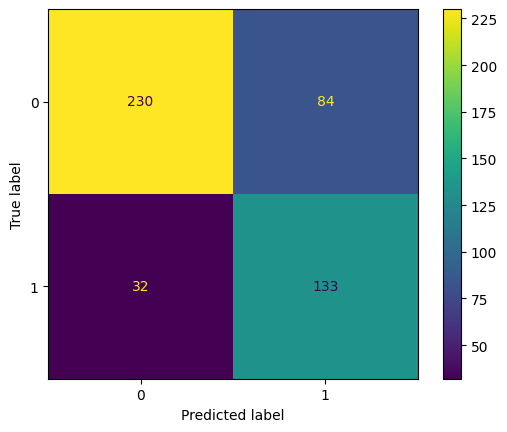

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix(train_y, tuned_train_pred__y))
display.plot()

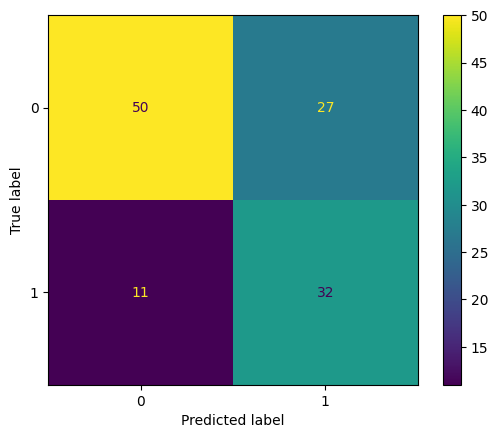

In [95]:
tuned_test_pred__y = np.where(predict_test_proba>0.45,1,0)

from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix(test_y, tuned_test_pred__y))
display.plot()

In [85]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        proba = self.model.predict_proba(X)[:, 1]
        return (proba >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.model.predict_proba(X)


In [87]:
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('Balanced_Sampling', RandomUnderSampler()),
        ('model', ThresholdClassifier(model=LogisticRegression(), threshold=0.45))
    ]
)


In [90]:
pipeline.fit(train_X, train_y)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [91]:
predict_train = pipeline.predict(train_X)
predict_test = pipeline.predict(test_X)

/opt/homebrew/lib/python3.11/site-packages/imblearn/pipeline.py:65: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 0.15 instead of the current warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/pipeline.py:65: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 0.15 instead of the current warning.
  warnings.warn(


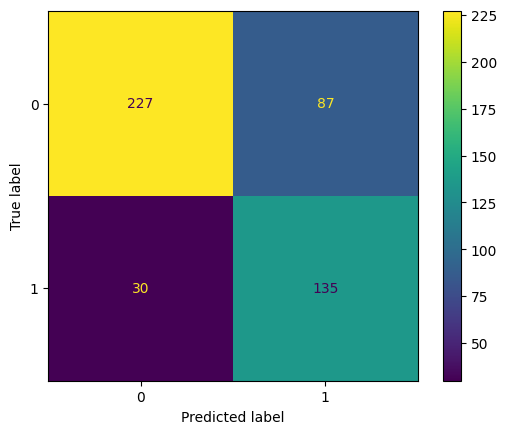

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix(train_y, predict_train))
display.plot()

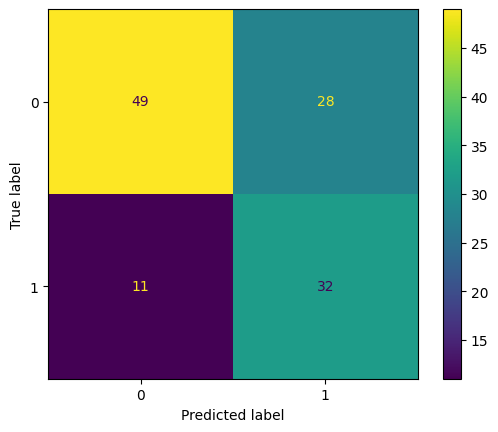

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix(test_y, predict_test))
display.plot()